In [3]:
!pip install vaderSentiment
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install ast
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 3.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 1.6 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
  Ins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import json
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('slatemate_ai_parents_control_dataset.csv')
df['screen_time_log'] = df['screen_time_log'].apply(ast.literal_eval)
df['app_category_usage'] = df['app_category_usage'].apply(ast.literal_eval)
df.head()

,student_id,screen_time_log,trigger_event,emotion_journal,app_category_usage,parent_warning_ignored,used_focus_mode,screen_breaks_taken,reward_unlocked
0,5a5e52d9-0243-4360-b31b-2f70e5dc146a,"[57, 10, 5, 45, 30, 39, 26, 42, 58, 38, 44, 5,...",Parental warning,Angry at my sibling.,"{'Entertainment': 94, 'Education': 92, 'Social...",False,False,4,False
1,5ceffa84-11dd-444e-a02d-7f57c8635330,"[11, 55, 44, 36, 21, 18, 46, 21, 52, 46, 6, 5,...",Parental warning,Excited for the weekend.,"{'Entertainment': 149, 'Education': 170, 'Soci...",False,True,3,True
2,eaf9bca9-355d-40ac-bf41-94fc06effacb,"[12, 48, 42, 7, 8, 45, 0, 38, 36, 23, 57, 36, ...",NaN,I am happy today!,"{'Entertainment': 131, 'Education': 49, 'Socia...",True,True,2,True
3,597e6e51-d2f8-4d37-a770-81f77ddd649c,"[12, 16, 20, 17, 34, 43, 19, 21, 32, 6, 57, 0,...",NaN,I'm bored and don't know what to do.,"{'Entertainment': 105, 'Education': 178, 'Soci...",True,False,3,False
4,c8493b5b-308e-47df-8f93-25b2a50c465d,"[21, 27, 15, 40, 45, 20, 10, 39, 40, 10, 13, 8...",Fight with friend,I am happy today!,"{'Entertainment': 69, 'Education': 90, 'Social...",False,False,5,False


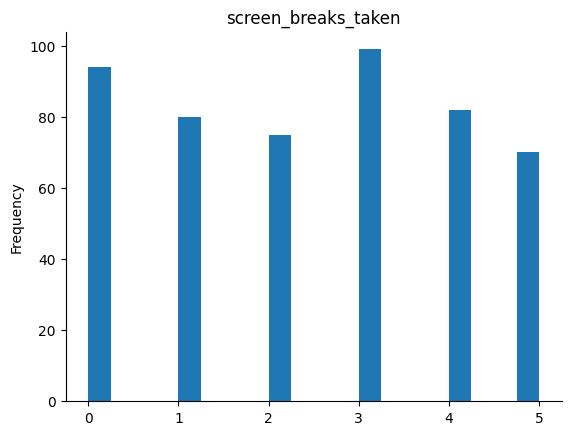

In [18]:
from matplotlib import pyplot as plt
df['screen_breaks_taken'].plot(kind='hist', bins=20, title='screen_breaks_taken')
plt.gca().spines[['top', 'right',]].set_visible(False)

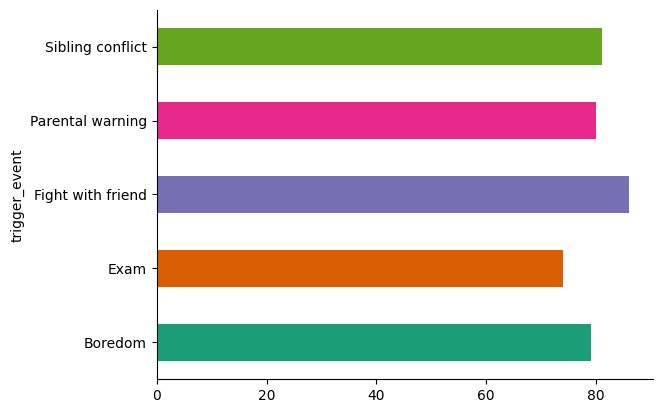

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('trigger_event').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

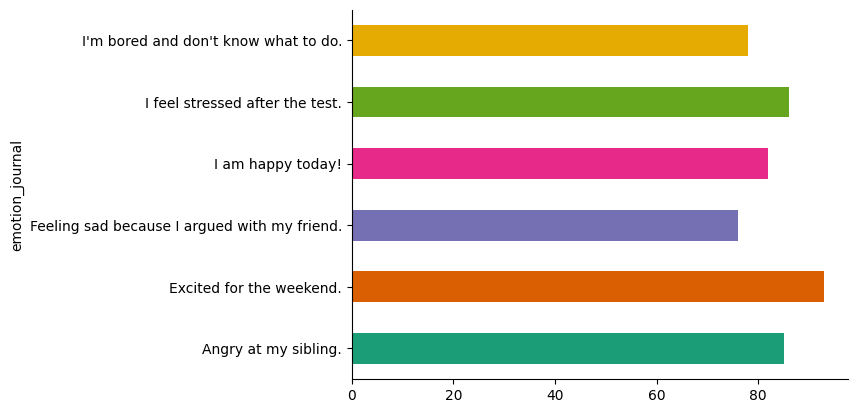

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('emotion_journal').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

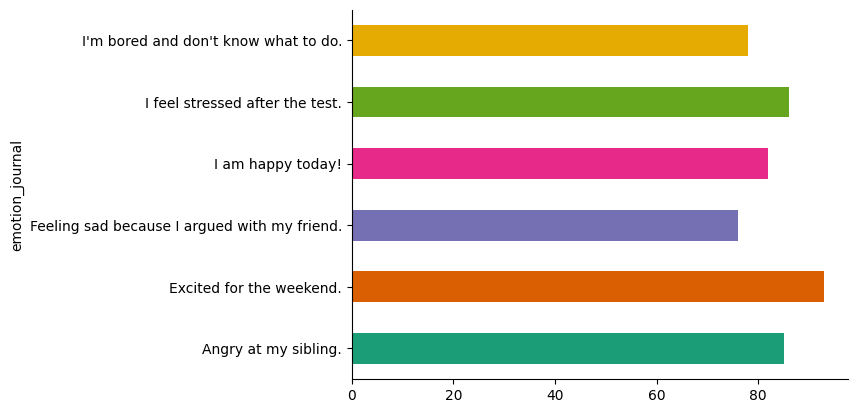

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('emotion_journal').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

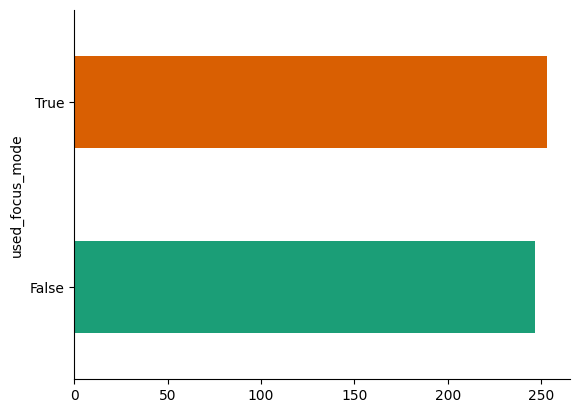

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('used_focus_mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [3]:
def extractScreenTimeFeatures(screen_time_log):
  return {
    "avgScreenTime":np.mean(screen_time_log),
    "maxScreenTime":np.max(screen_time_log),
    "minScreenTime":np.min(screen_time_log),
    "stdScreenTime":np.std(screen_time_log),
    "totalScreenTime":np.sum(screen_time_log)
  }

screenTimeFeatures=df['screen_time_log'].apply(extractScreenTimeFeatures)
screen_df=pd.DataFrame(screenTimeFeatures.tolist())
df=pd.concat([df,screen_df],axis=1)
df

,student_id,screen_time_log,trigger_event,emotion_journal,app_category_usage,parent_warning_ignored,used_focus_mode,screen_breaks_taken,reward_unlocked,avgScreenTime,maxScreenTime,minScreenTime,stdScreenTime,totalScreenTime
0,5a5e52d9-0243-4360-b31b-2f70e5dc146a,"[57, 10, 5, 45, 30, 39, 26, 42, 58, 38, 44, 5,...",Parental warning,Angry at my sibling.,"{'Entertainment': 94, 'Education': 92, 'Social...",False,False,4,False,29.773810,60,0,17.421833,5002
1,5ceffa84-11dd-444e-a02d-7f57c8635330,"[11, 55, 44, 36, 21, 18, 46, 21, 52, 46, 6, 5,...",Parental warning,Excited for the weekend.,"{'Entertainment': 149, 'Education': 170, 'Soci...",False,True,3,True,30.410714,60,0,17.948448,5109
2,eaf9bca9-355d-40ac-bf41-94fc06effacb,"[12, 48, 42, 7, 8, 45, 0, 38, 36, 23, 57, 36, ...",NaN,I am happy today!,"{'Entertainment': 131, 'Education': 49, 'Socia...",True,True,2,True,30.410714,60,0,17.314091,5109
3,597e6e51-d2f8-4d37-a770-81f77ddd649c,"[12, 16, 20, 17, 34, 43, 19, 21, 32, 6, 57, 0,...",NaN,I'm bored and don't know what to do.,"{'Entertainment': 105, 'Education': 178, 'Soci...",True,False,3,False,32.023810,60,0,17.676307,5380
4,c8493b5b-308e-47df-8f93-25b2a50c465d,"[21, 27, 15, 40, 45, 20, 10, 39, 40, 10, 13, 8...",Fight with friend,I am happy today!,"{'Entertainment': 69, 'Education': 90, 'Social...",False,False,5,False,29.994048,60,0,16.146833,5039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,589c2c6f-16c8-477e-98d3-a4e7629e30dd,"[29, 23, 31, 1, 5, 13, 58, 58, 44, 42, 16, 0, ...",Sibling conflict,Excited for the weekend.,"{'Entertainment': 147, 'Education': 123, 'Soci...",False,False,0,True,30.523810,59,0,17.040901,5128
496,ed051af8-5a82-4bfb-a913-d2dfe0d88a52,"[2, 26, 57, 24, 16, 11, 6, 6, 39, 15, 37, 58, ...",Exam,I'm bored and don't know what to do.,"{'Entertainment': 44, 'Education': 165, 'Socia...",False,False,4,True,28.744048,59,0,17.368896,4829
497,53a4b536-6f17-4581-8b37-2d3a53a1c3ee,"[24, 25, 2, 6, 6, 10, 11, 15, 59, 58, 20, 15, ...",Boredom,I'm bored and don't know what to do.,"{'Entertainment': 115, 'Education': 148, 'Soci...",False,True,1,False,30.922619,60,0,17.672954,5195
498,ff1237d6-4a1e-479b-8775-75f13b24800c,"[25, 5, 54, 46, 48, 33, 9, 23, 58, 52, 41, 57,...",Exam,Angry at my sibling.,"{'Entertainment': 59, 'Education': 141, 'Socia...",False,False,5,True,30.440476,60,0,16.955369,5114


In [4]:
app_df=df['app_category_usage'].apply(pd.Series)
app_df

,Entertainment,Education,Social Media,Others
0,94,92,159,53
1,149,170,32,116
2,131,49,99,126
3,105,178,135,73
4,69,90,117,92
...,...,...,...,...
495,147,123,129,132
496,44,165,119,21
497,115,148,35,13
498,59,141,121,23


In [5]:
df = pd.concat([df, app_df], axis=1)
df.rename(columns={
    "Entertainment": "entMinutes",
    "Education": "eduMinutes",
    "Social Media": "socialMinutes",
    "Others": "otherMinutes"
}, inplace=True)
df

,student_id,screen_time_log,trigger_event,emotion_journal,app_category_usage,parent_warning_ignored,used_focus_mode,screen_breaks_taken,reward_unlocked,avgScreenTime,maxScreenTime,minScreenTime,stdScreenTime,totalScreenTime,entMinutes,eduMinutes,socialMinutes,otherMinutes
0,5a5e52d9-0243-4360-b31b-2f70e5dc146a,"[57, 10, 5, 45, 30, 39, 26, 42, 58, 38, 44, 5,...",Parental warning,Angry at my sibling.,"{'Entertainment': 94, 'Education': 92, 'Social...",False,False,4,False,29.773810,60,0,17.421833,5002,94,92,159,53
1,5ceffa84-11dd-444e-a02d-7f57c8635330,"[11, 55, 44, 36, 21, 18, 46, 21, 52, 46, 6, 5,...",Parental warning,Excited for the weekend.,"{'Entertainment': 149, 'Education': 170, 'Soci...",False,True,3,True,30.410714,60,0,17.948448,5109,149,170,32,116
2,eaf9bca9-355d-40ac-bf41-94fc06effacb,"[12, 48, 42, 7, 8, 45, 0, 38, 36, 23, 57, 36, ...",NaN,I am happy today!,"{'Entertainment': 131, 'Education': 49, 'Socia...",True,True,2,True,30.410714,60,0,17.314091,5109,131,49,99,126
3,597e6e51-d2f8-4d37-a770-81f77ddd649c,"[12, 16, 20, 17, 34, 43, 19, 21, 32, 6, 57, 0,...",NaN,I'm bored and don't know what to do.,"{'Entertainment': 105, 'Education': 178, 'Soci...",True,False,3,False,32.023810,60,0,17.676307,5380,105,178,135,73
4,c8493b5b-308e-47df-8f93-25b2a50c465d,"[21, 27, 15, 40, 45, 20, 10, 39, 40, 10, 13, 8...",Fight with friend,I am happy today!,"{'Entertainment': 69, 'Education': 90, 'Social...",False,False,5,False,29.994048,60,0,16.146833,5039,69,90,117,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,589c2c6f-16c8-477e-98d3-a4e7629e30dd,"[29, 23, 31, 1, 5, 13, 58, 58, 44, 42, 16, 0, ...",Sibling conflict,Excited for the weekend.,"{'Entertainment': 147, 'Education': 123, 'Soci...",False,False,0,True,30.523810,59,0,17.040901,5128,147,123,129,132
496,ed051af8-5a82-4bfb-a913-d2dfe0d88a52,"[2, 26, 57, 24, 16, 11, 6, 6, 39, 15, 37, 58, ...",Exam,I'm bored and don't know what to do.,"{'Entertainment': 44, 'Education': 165, 'Socia...",False,False,4,True,28.744048,59,0,17.368896,4829,44,165,119,21
497,53a4b536-6f17-4581-8b37-2d3a53a1c3ee,"[24, 25, 2, 6, 6, 10, 11, 15, 59, 58, 20, 15, ...",Boredom,I'm bored and don't know what to do.,"{'Entertainment': 115, 'Education': 148, 'Soci...",False,True,1,False,30.922619,60,0,17.672954,5195,115,148,35,13
498,ff1237d6-4a1e-479b-8775-75f13b24800c,"[25, 5, 54, 46, 48, 33, 9, 23, 58, 52, 41, 57,...",Exam,Angry at my sibling.,"{'Entertainment': 59, 'Education': 141, 'Socia...",False,False,5,True,30.440476,60,0,16.955369,5114,59,141,121,23


In [ ]:
# Emotion/Sentiment Detection using VADER
analyzer=SentimentIntensityAnalyzer()
def detect_emotion(text):
    sentiment=analyzer.polarity_scores(str(text))
    compound=sentiment['compound']
    if compound>=0.5:
        return "Positive"
    elif compound>0:
        return "Neutral"
    elif compound<=-0.5:
        return "Angry"
    elif "sad" in text.lower():
        return "Sad"
    else:
        return "Anxious"
df['dominantEmotion']=df['emotion_journal'].apply(detect_emotion)
df.head()

,student_id,screen_time_log,trigger_event,emotion_journal,app_category_usage,parent_warning_ignored,used_focus_mode,screen_breaks_taken,reward_unlocked,avgScreenTime,maxScreenTime,minScreenTime,stdScreenTime,totalScreenTime,entMinutes,eduMinutes,socialMinutes,otherMinutes,dominantEmotion
0,5a5e52d9-0243-4360-b31b-2f70e5dc146a,"[57, 10, 5, 45, 30, 39, 26, 42, 58, 38, 44, 5,...",Parental warning,Angry at my sibling.,"{'Entertainment': 94, 'Education': 92, 'Social...",False,False,4,False,29.773810,60,0,17.421833,5002,94,92,159,53,Angry
1,5ceffa84-11dd-444e-a02d-7f57c8635330,"[11, 55, 44, 36, 21, 18, 46, 21, 52, 46, 6, 5,...",Parental warning,Excited for the weekend.,"{'Entertainment': 149, 'Education': 170, 'Soci...",False,True,3,True,30.410714,60,0,17.948448,5109,149,170,32,116,Neutral
2,eaf9bca9-355d-40ac-bf41-94fc06effacb,"[12, 48, 42, 7, 8, 45, 0, 38, 36, 23, 57, 36, ...",NaN,I am happy today!,"{'Entertainment': 131, 'Education': 49, 'Socia...",True,True,2,True,30.410714,60,0,17.314091,5109,131,49,99,126,Positive
3,597e6e51-d2f8-4d37-a770-81f77ddd649c,"[12, 16, 20, 17, 34, 43, 19, 21, 32, 6, 57, 0,...",NaN,I'm bored and don't know what to do.,"{'Entertainment': 105, 'Education': 178, 'Soci...",True,False,3,False,32.023810,60,0,17.676307,5380,105,178,135,73,Anxious
4,c8493b5b-308e-47df-8f93-25b2a50c465d,"[21, 27, 15, 40, 45, 20, 10, 39, 40, 10, 13, 8...",Fight with friend,I am happy today!,"{'Entertainment': 69, 'Education': 90, 'Social...",False,False,5,False,29.994048,60,0,16.146833,5039,69,90,117,92,Positive


In [9]:
features=[
    "avgScreenTime", "stdScreenTime", "totalScreenTime",
    "entMinutes", "eduMinutes", "socialMinutes", "otherMinutes",
    "screen_breaks_taken"
]
X=df[features]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-0.11337439, -0.13748633, -0.11337439, ...,  1.35685033,
        -0.93488379,  0.94053207],
       [ 0.36313829,  0.66759724,  0.36313829, ..., -1.34841501,
         0.40163429,  0.34900247],
       [ 0.36313829, -0.30220143,  0.36313829, ...,  0.07877221,
         0.61378002, -0.24252714],
       ...,
       [ 0.7461298 ,  0.24642452,  0.7461298 , ..., -1.2845111 ,
        -1.7834667 , -0.83405674],
       [ 0.38540524, -0.85061098,  0.38540524, ...,  0.54740086,
        -1.57132097,  1.53206168],
       [-1.11984044,  0.42275815, -1.11984044, ...,  0.03616961,
         0.71985288,  0.94053207]], shape=(500, 8))

In [10]:
kmeans=KMeans(n_clusters=4,random_state=42)
df['habitCluster']=kmeans.fit_predict(X_scaled)
cluster_map = {
    0: "Balanced Explorer",
    1: "Mindless Scroller",
    2: "Stress Escaper",
    3: "Goal-Oriented Learner"
}
df['digitalHabitType']=df['habitCluster'].map(cluster_map)
df

,student_id,screen_time_log,trigger_event,emotion_journal,app_category_usage,parent_warning_ignored,used_focus_mode,screen_breaks_taken,reward_unlocked,avgScreenTime,...,minScreenTime,stdScreenTime,totalScreenTime,entMinutes,eduMinutes,socialMinutes,otherMinutes,dominantEmotion,habitCluster,digitalHabitType
0,5a5e52d9-0243-4360-b31b-2f70e5dc146a,"[57, 10, 5, 45, 30, 39, 26, 42, 58, 38, 44, 5,...",Parental warning,Angry at my sibling.,"{'Entertainment': 94, 'Education': 92, 'Social...",False,False,4,False,29.773810,...,0,17.421833,5002,94,92,159,53,Angry,1,Mindless Scroller
1,5ceffa84-11dd-444e-a02d-7f57c8635330,"[11, 55, 44, 36, 21, 18, 46, 21, 52, 46, 6, 5,...",Parental warning,Excited for the weekend.,"{'Entertainment': 149, 'Education': 170, 'Soci...",False,True,3,True,30.410714,...,0,17.948448,5109,149,170,32,116,Neutral,0,Balanced Explorer
2,eaf9bca9-355d-40ac-bf41-94fc06effacb,"[12, 48, 42, 7, 8, 45, 0, 38, 36, 23, 57, 36, ...",NaN,I am happy today!,"{'Entertainment': 131, 'Education': 49, 'Socia...",True,True,2,True,30.410714,...,0,17.314091,5109,131,49,99,126,Positive,3,Goal-Oriented Learner
3,597e6e51-d2f8-4d37-a770-81f77ddd649c,"[12, 16, 20, 17, 34, 43, 19, 21, 32, 6, 57, 0,...",NaN,I'm bored and don't know what to do.,"{'Entertainment': 105, 'Education': 178, 'Soci...",True,False,3,False,32.023810,...,0,17.676307,5380,105,178,135,73,Anxious,0,Balanced Explorer
4,c8493b5b-308e-47df-8f93-25b2a50c465d,"[21, 27, 15, 40, 45, 20, 10, 39, 40, 10, 13, 8...",Fight with friend,I am happy today!,"{'Entertainment': 69, 'Education': 90, 'Social...",False,False,5,False,29.994048,...,0,16.146833,5039,69,90,117,92,Positive,1,Mindless Scroller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,589c2c6f-16c8-477e-98d3-a4e7629e30dd,"[29, 23, 31, 1, 5, 13, 58, 58, 44, 42, 16, 0, ...",Sibling conflict,Excited for the weekend.,"{'Entertainment': 147, 'Education': 123, 'Soci...",False,False,0,True,30.523810,...,0,17.040901,5128,147,123,129,132,Neutral,0,Balanced Explorer
496,ed051af8-5a82-4bfb-a913-d2dfe0d88a52,"[2, 26, 57, 24, 16, 11, 6, 6, 39, 15, 37, 58, ...",Exam,I'm bored and don't know what to do.,"{'Entertainment': 44, 'Education': 165, 'Socia...",False,False,4,True,28.744048,...,0,17.368896,4829,44,165,119,21,Anxious,1,Mindless Scroller
497,53a4b536-6f17-4581-8b37-2d3a53a1c3ee,"[24, 25, 2, 6, 6, 10, 11, 15, 59, 58, 20, 15, ...",Boredom,I'm bored and don't know what to do.,"{'Entertainment': 115, 'Education': 148, 'Soci...",False,True,1,False,30.922619,...,0,17.672954,5195,115,148,35,13,Anxious,0,Balanced Explorer
498,ff1237d6-4a1e-479b-8775-75f13b24800c,"[25, 5, 54, 46, 48, 33, 9, 23, 58, 52, 41, 57,...",Exam,Angry at my sibling.,"{'Entertainment': 59, 'Education': 141, 'Socia...",False,False,5,True,30.440476,...,0,16.955369,5114,59,141,121,23,Angry,1,Mindless Scroller


In [13]:
def recommendations(row):
    alerts=[]
    recs=[]
    if row['parent_warning_ignored']==True:
        alerts.append("Ignored parental warnings")
        recs.append("Trigger soft reminder after 3 ignores")
    if row['screen_breaks_taken']<2:
        alerts.append("No breaks during binge usage")
        recs.append("Enable mandatory screen breaks after 45 mins")
    if row['used_focus_mode']==False:
        recs.append("Introduce focus mode tutorial")
    if row['dominantEmotion']in['Angry','Anxious','Sad']:
        alerts.append("Negative emotion detected: "+row['dominantEmotion'])
        recs.append("Prompt emotional journal reflection or breathing exercise")
    if row['digitalHabitType']=="Mindless Scroller":
        recs.append("Suggest 15-min limit on Social Media")
    if row['digitalHabitType'] == "Goal-Oriented Learner":
        recs.append("Praise effort and encourage learning streak")
    return alerts, recs
df[['alerts','recommendations']]=df.apply(lambda row:pd.Series(recommendations(row)),axis=1)
df

,student_id,screen_time_log,trigger_event,emotion_journal,app_category_usage,parent_warning_ignored,used_focus_mode,screen_breaks_taken,reward_unlocked,avgScreenTime,...,totalScreenTime,entMinutes,eduMinutes,socialMinutes,otherMinutes,dominantEmotion,habitCluster,digitalHabitType,alerts,recommendations
0,5a5e52d9-0243-4360-b31b-2f70e5dc146a,"[57, 10, 5, 45, 30, 39, 26, 42, 58, 38, 44, 5,...",Parental warning,Angry at my sibling.,"{'Entertainment': 94, 'Education': 92, 'Social...",False,False,4,False,29.773810,...,5002,94,92,159,53,Angry,1,Mindless Scroller,[Negative emotion detected: Angry],"[Introduce focus mode tutorial, Prompt emotion..."
1,5ceffa84-11dd-444e-a02d-7f57c8635330,"[11, 55, 44, 36, 21, 18, 46, 21, 52, 46, 6, 5,...",Parental warning,Excited for the weekend.,"{'Entertainment': 149, 'Education': 170, 'Soci...",False,True,3,True,30.410714,...,5109,149,170,32,116,Neutral,0,Balanced Explorer,[],[]
2,eaf9bca9-355d-40ac-bf41-94fc06effacb,"[12, 48, 42, 7, 8, 45, 0, 38, 36, 23, 57, 36, ...",NaN,I am happy today!,"{'Entertainment': 131, 'Education': 49, 'Socia...",True,True,2,True,30.410714,...,5109,131,49,99,126,Positive,3,Goal-Oriented Learner,[Ignored parental warnings],"[Trigger soft reminder after 3 ignores, Praise..."
3,597e6e51-d2f8-4d37-a770-81f77ddd649c,"[12, 16, 20, 17, 34, 43, 19, 21, 32, 6, 57, 0,...",NaN,I'm bored and don't know what to do.,"{'Entertainment': 105, 'Education': 178, 'Soci...",True,False,3,False,32.023810,...,5380,105,178,135,73,Anxious,0,Balanced Explorer,"[Ignored parental warnings, Negative emotion d...","[Trigger soft reminder after 3 ignores, Introd..."
4,c8493b5b-308e-47df-8f93-25b2a50c465d,"[21, 27, 15, 40, 45, 20, 10, 39, 40, 10, 13, 8...",Fight with friend,I am happy today!,"{'Entertainment': 69, 'Education': 90, 'Social...",False,False,5,False,29.994048,...,5039,69,90,117,92,Positive,1,Mindless Scroller,[],"[Introduce focus mode tutorial, Suggest 15-min..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,589c2c6f-16c8-477e-98d3-a4e7629e30dd,"[29, 23, 31, 1, 5, 13, 58, 58, 44, 42, 16, 0, ...",Sibling conflict,Excited for the weekend.,"{'Entertainment': 147, 'Education': 123, 'Soci...",False,False,0,True,30.523810,...,5128,147,123,129,132,Neutral,0,Balanced Explorer,[No breaks during binge usage],"[Enable mandatory screen breaks after 45 mins,..."
496,ed051af8-5a82-4bfb-a913-d2dfe0d88a52,"[2, 26, 57, 24, 16, 11, 6, 6, 39, 15, 37, 58, ...",Exam,I'm bored and don't know what to do.,"{'Entertainment': 44, 'Education': 165, 'Socia...",False,False,4,True,28.744048,...,4829,44,165,119,21,Anxious,1,Mindless Scroller,[Negative emotion detected: Anxious],"[Introduce focus mode tutorial, Prompt emotion..."
497,53a4b536-6f17-4581-8b37-2d3a53a1c3ee,"[24, 25, 2, 6, 6, 10, 11, 15, 59, 58, 20, 15, ...",Boredom,I'm bored and don't know what to do.,"{'Entertainment': 115, 'Education': 148, 'Soci...",False,True,1,False,30.922619,...,5195,115,148,35,13,Anxious,0,Balanced Explorer,"[No breaks during binge usage, Negative emotio...","[Enable mandatory screen breaks after 45 mins,..."
498,ff1237d6-4a1e-479b-8775-75f13b24800c,"[25, 5, 54, 46, 48, 33, 9, 23, 58, 52, 41, 57,...",Exam,Angry at my sibling.,"{'Entertainment': 59, 'Education': 141, 'Socia...",False,False,5,True,30.440476,...,5114,59,141,121,23,Angry,1,Mindless Scroller,[Negative emotion detected: Angry],"[Introduce focus mode tutorial, Prompt emotion..."


In [17]:
def generate_child_summary(row):
    return{
        "student_id":row["student_id"],
        "digital_habit_type":row["digitalHabitType"],
        "dominant_emotion":row["dominantEmotion"],
        "alerts":row["alerts"],
        "recommendations":row["recommendations"]
    }
summary=generate_child_summary(df.iloc[2])
print(json.dumps(summary,indent=2))

{
  "student_id": "eaf9bca9-355d-40ac-bf41-94fc06effacb",
  "digital_habit_type": "Goal-Oriented Learner",
  "dominant_emotion": "Positive",
  "alerts": [
    "Ignored parental warnings"
  ],
  "recommendations": [
    "Trigger soft reminder after 3 ignores",
    "Praise effort and encourage learning streak"
  ]
}
